In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
rm ~/.kaggle

rm: cannot remove '/root/.kaggle': Is a directory


In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp /content/gdrive/My\ Drive/kaggle.json /root/.kaggle

In [6]:
!kaggle datasets download -d pestipeti/bengaliai

bengaliai.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip /content/bengaliai.zip -d /content/images

Archive:  /content/bengaliai.zip
replace /content/images/256_train/256/Train_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import pandas as pd
from fastai.vision import *
df = pd.read_csv('/content/gdrive/My Drive/kaggle/train.csv')

In [0]:
df['labels']= df['consonant_diacritic']
df = df.filter(['image_id','labels'])

In [0]:
tfms = []
il= ImageList.from_df(df=df,path = '/content/images/256_train/256',suffix='.png')
sd = il.split_by_rand_pct(0.1)

In [35]:
sd

ItemLists;

Train: ImageList (180756 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /content/images/256_train/256;

Valid: ImageList (20084 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /content/images/256_train/256;

Test: None

In [0]:
ll = sd.label_from_df()

In [0]:
databunch32 = ll.transform(tfms,size=32).databunch(bs=256)

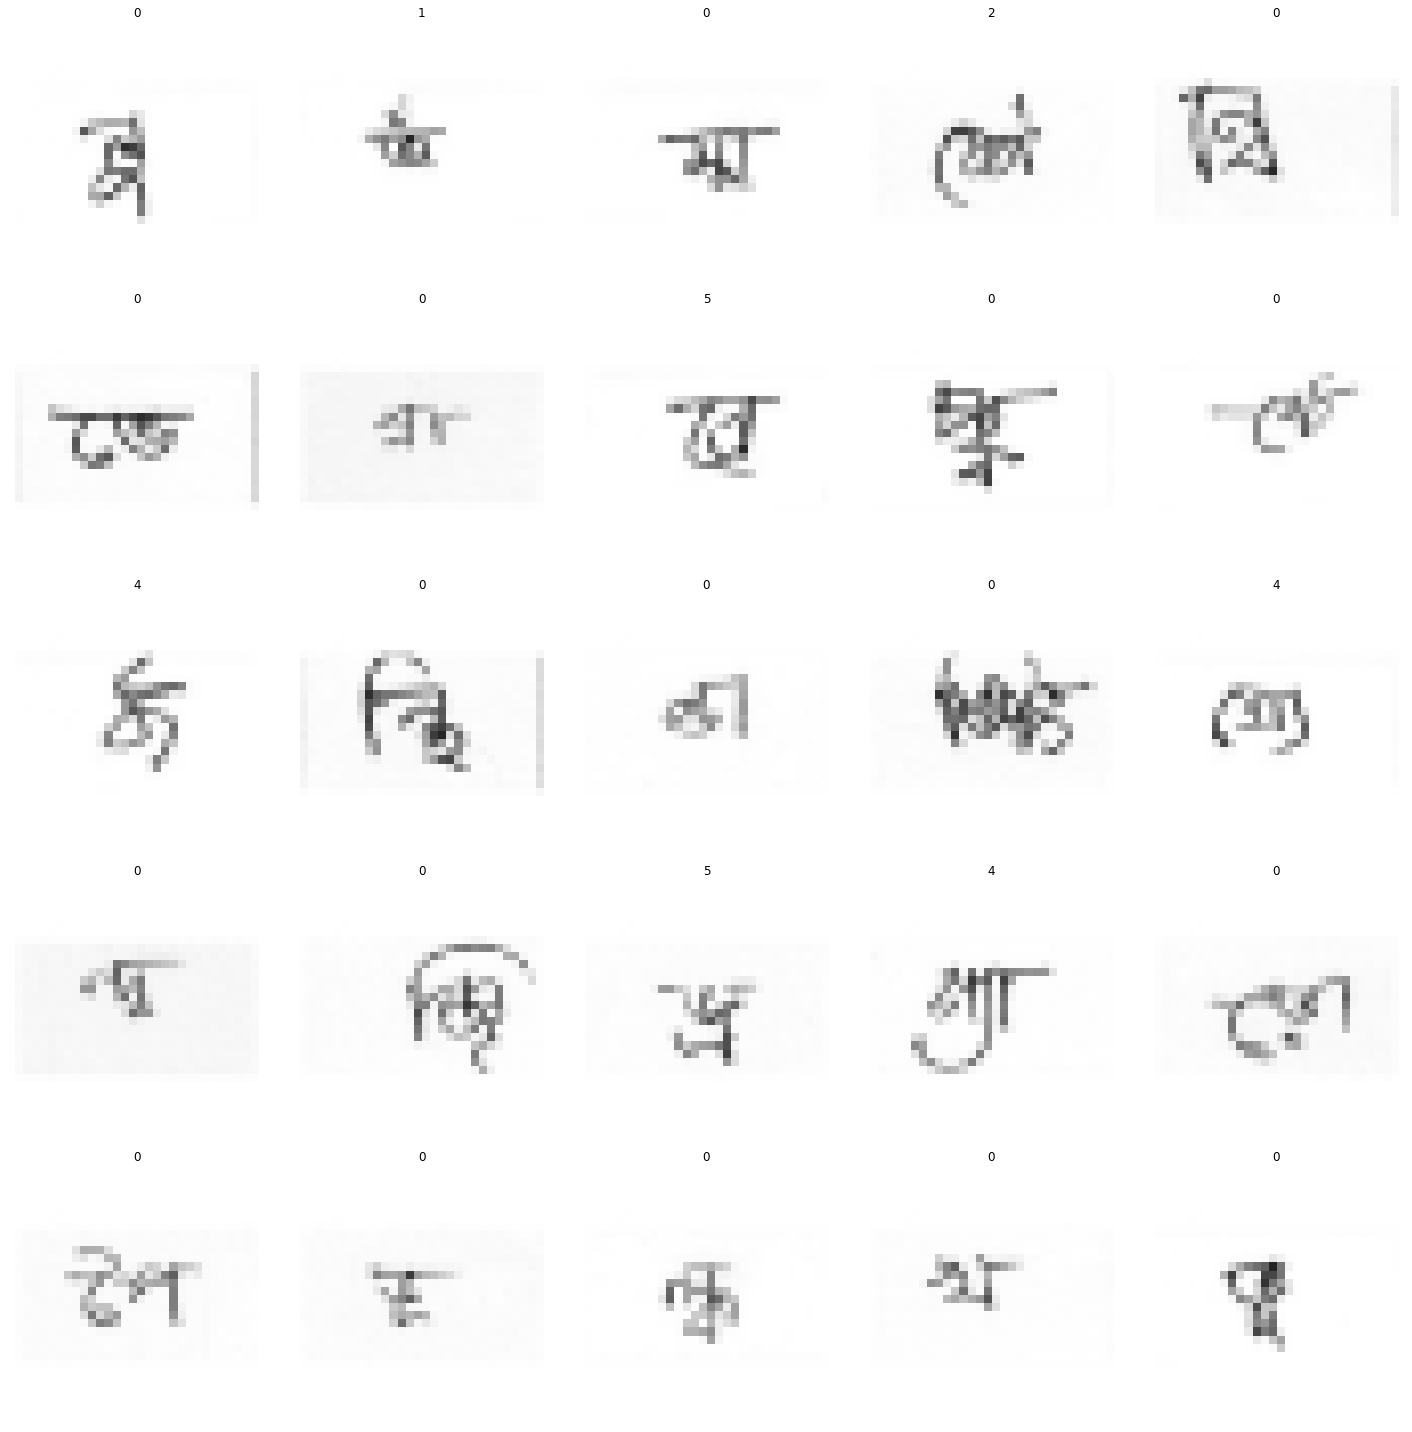

In [38]:
databunch32.show_batch()

In [0]:
recall = Recall(average='macro')
learner32 = cnn_learner(databunch32,models.resnet18,metrics=[recall,accuracy],pretrained=False).mixup()

In [0]:
learner32.unfreeze()

In [41]:
learner32.lr_find()

epoch,train_loss,valid_loss,recall,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


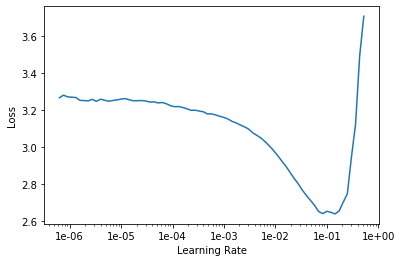

In [42]:
learner32.recorder.plot()

In [43]:
learner32.fit_one_cycle(4,slice(1e-2))

epoch,train_loss,valid_loss,recall,accuracy,time
0,0.984051,2.268044,0.184228,0.131249,05:46
1,0.766864,1.691152,0.252717,0.261054,05:44
2,0.658481,1.233749,0.567214,0.439604,05:44
3,0.620020,0.382872,0.713246,0.871440,05:44


In [0]:
learner32.data = ll.transform(tfms,size=64).databunch(bs=256)

In [0]:
learner32.unfreeze()

epoch,train_loss,valid_loss,recall,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


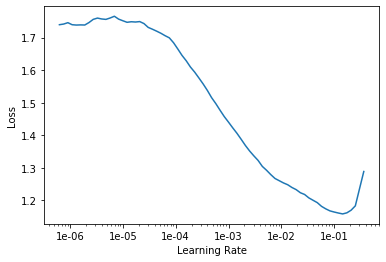

In [46]:
learner32.lr_find()
learner32.recorder.plot()

In [47]:
learner32.fit_one_cycle(4,slice(1e-3,1e-2))

epoch,train_loss,valid_loss,recall,accuracy,time
0,0.549876,2.890659,0.242909,0.080711,07:21
1,0.500931,0.760729,0.518430,0.752987,07:26
2,0.449692,0.179423,0.884243,0.946923,07:30
3,0.420829,0.157393,0.902297,0.951056,07:33


In [0]:
learner32.data = ll.transform(tfms,size=128).databunch(bs=256)

In [0]:
learner32.unfreeze()

epoch,train_loss,valid_loss,recall,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


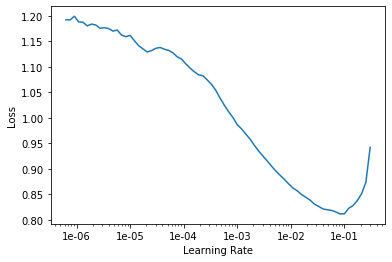

In [50]:
learner32.lr_find()
learner32.recorder.plot()

In [0]:
learner32.save('/content/gdrive/My Drive/res18_cons_fastai_mixup')

In [27]:
learner32.fit_one_cycle(6,slice(1e-3,1e-2))

epoch,train_loss,valid_loss,recall,accuracy,time
0,0.640555,0.780121,0.703414,0.817467,11:27
1,0.614569,4.813475,0.284519,0.383240,11:25
2,0.545349,2.852770,0.263035,0.238000,11:26
3,0.503627,0.743247,0.761398,0.824537,11:26
4,0.462393,0.174165,0.947993,0.970723,11:27
5,0.440709,0.066968,0.977989,0.983071,11:27


In [0]:
learner32.save('/content/gdrive/My Drive/res-18_vowel_fastai_mixup')

In [0]:
learner32.unfreeze()

epoch,train_loss,valid_loss,recall,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


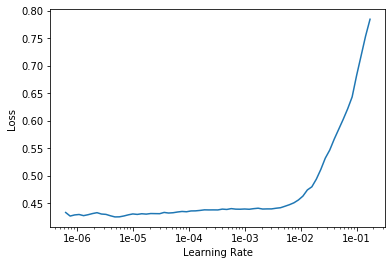

In [30]:
learner32.lr_find()
learner32.recorder.plot()

In [31]:
learner32.fit_one_cycle(4,slice(1e-5,2e-4))

epoch,train_loss,valid_loss,recall,accuracy,time


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
interp=ClassificationInterpretation.from_learner(learner32)

In [0]:
interp.plot_multi_top_losses(20,figsize=(5,5))